In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.signal import savgol_filter

In [3]:
data = pd.read_csv('../data.csv')
data.shape

(200000, 105)

In [3]:
data.head()

,id,class,y1,y2,y3,x1,x2,x3,x4,x5,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,1,2,-587.360784,-0.331308,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.32540,2204.278945,21606.40501,16746.254820,213.098000
1,2,2,-587.359946,-0.329316,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.76938,2076.587979,17602.16397,2199.601888,506.651409
2,3,2,-587.366330,-0.324781,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.24822,497.946181,16759.45898,17687.268850,575.511247
3,4,1,-534.430563,-0.323772,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.52210,2518.506658,37359.79966,5784.140268,530.878047
4,5,2,-838.152165,-0.323753,-0.038820,0.169158,0.000067,0.284934,-838.102038,90.368137,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.77672,2971.889099,36697.28506,17496.357370,640.112190


In [4]:
data.describe()

,id,class,y1,y2,y3,x1,x2,x3,x4,x5,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,2.106935,-492.668955,-0.230652,0.005855,0.187811,0.000063,0.236507,-492.622116,93.027628,...,101.999506,42.274682,562.734699,1682.573300,1906.112899,14649.117868,1829.704568,20614.768880,12255.689693,364.170122
std,57735.171256,0.728912,125.409537,0.023737,0.044903,0.036627,0.000007,0.053798,125.408955,10.997118,...,58.764821,24.420338,324.500287,970.855873,1100.541051,8471.985899,1054.248191,11907.164336,7081.965656,210.555060
min,1.000000,1.000000,-1725.106561,-0.331308,-0.220137,0.054844,0.000036,0.036167,-1725.059554,59.017874,...,0.001690,0.000805,0.009348,0.016116,0.052997,0.081641,0.008122,0.034369,0.014815,0.001187
25%,50000.750000,2.000000,-499.179990,-0.245154,-0.025577,0.163126,0.000058,0.201313,-499.132629,85.599658,...,51.277375,21.098356,282.250466,842.700608,951.465466,7303.382147,916.538284,10306.590233,6116.527229,181.891698
50%,100000.500000,2.000000,-462.054593,-0.233779,0.009641,0.187499,0.000062,0.240052,-462.009819,91.881943,...,102.089518,42.247293,561.972688,1682.636781,1908.550035,14636.804600,1831.022594,20631.912400,12271.989845,363.842076
75%,150000.250000,2.000000,-426.119354,-0.219274,0.035669,0.211735,0.000067,0.275422,-426.074170,99.303380,...,152.751834,63.414376,842.757181,2523.512481,2859.202697,22021.209500,2741.593575,30918.659795,18393.340342,546.954572
max,200000.000000,4.000000,-347.259754,-0.152657,0.100690,0.358950,0.000105,0.406642,-347.221141,153.868335,...,203.891031,84.586630,1126.213836,3363.721137,3811.360185,29336.220750,3654.013669,41193.414860,24469.070150,728.990771


In [5]:
# 重复值
print("number of duplicates = " + str(data.duplicated().sum()))

number of duplicates = 0


In [6]:
# 缺失值
print(data.isna().sum())

id       0
class    0
y1       0
y2       0
y3       0
        ..
x96      0
x97      0
x98      0
x99      0
x100     0
Length: 105, dtype: int64


特征提取

In [4]:
df = data.iloc[:,2:105]
df.tail()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
199995,-419.504748,-0.152722,-0.025667,0.169241,0.000055,0.127055,-419.459364,79.538702,-419.468874,-419.458420,...,63.361697,39.151228,94.862755,1968.900543,501.442536,14489.037340,1554.543619,26717.867000,6227.496125,548.720052
199996,-419.494291,-0.152693,-0.018547,0.168173,0.000059,0.134146,-419.448829,78.753240,-419.458752,-419.447884,...,110.211710,0.088873,139.355293,1608.385691,1017.910470,19022.048140,2359.630960,22182.780890,19762.010290,194.794578
199997,-406.836695,-0.152680,-0.041361,0.233604,0.000067,0.111320,-406.786417,108.276082,-406.797683,-406.785473,...,13.798549,37.889274,828.723926,2080.905500,776.676895,11712.821270,2686.690842,3036.807908,2058.707100,474.257489
199998,-440.592967,-0.152678,-0.008569,0.180136,0.000060,0.144109,-440.548209,76.762032,-440.558158,-440.547265,...,29.168705,15.882359,654.330446,620.222337,2396.827918,6858.319928,1065.978203,9818.305268,6949.049915,502.028596
199999,-463.293589,-0.152657,-0.021764,0.270812,0.000083,0.130893,-463.239421,112.452495,-463.253360,-463.238477,...,165.696065,42.040440,212.433831,2321.119201,736.981524,14759.075440,1735.312436,9564.510604,18369.448760,580.469209


异常值检测与清除

IQR四分位方法

In [6]:
from scipy.interpolate import interp1d
def redo_outliers(df):
    # 对每一列进行异常值处理
    for column in df.columns:
        Q1 = df[column].quantile(0.1)
        Q3 = df[column].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 将异常值设为 NaN
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), 
                              np.nan, df[column])
    return df

# 对数据框 df 的所有列应用 IQR 异常值处理
df_cleaned = redo_outliers(df)
df_cleaned.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,-587.360784,NaN,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,-587.323859,-587.312441,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.32540,2204.278945,21606.40501,16746.254820,213.098000
1,-587.359946,NaN,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,-587.323542,-587.312123,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.76938,2076.587979,17602.16397,2199.601888,506.651409
2,-587.366330,NaN,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,-587.329854,-587.318660,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.24822,497.946181,16759.45898,17687.268850,575.511247
3,-534.430563,NaN,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,-534.394372,-534.383246,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.52210,2518.506658,37359.79966,5784.140268,530.878047
4,NaN,NaN,-0.038820,0.169158,0.000067,0.284934,NaN,90.368137,NaN,NaN,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.77672,2971.889099,36697.28506,17496.357370,640.112190


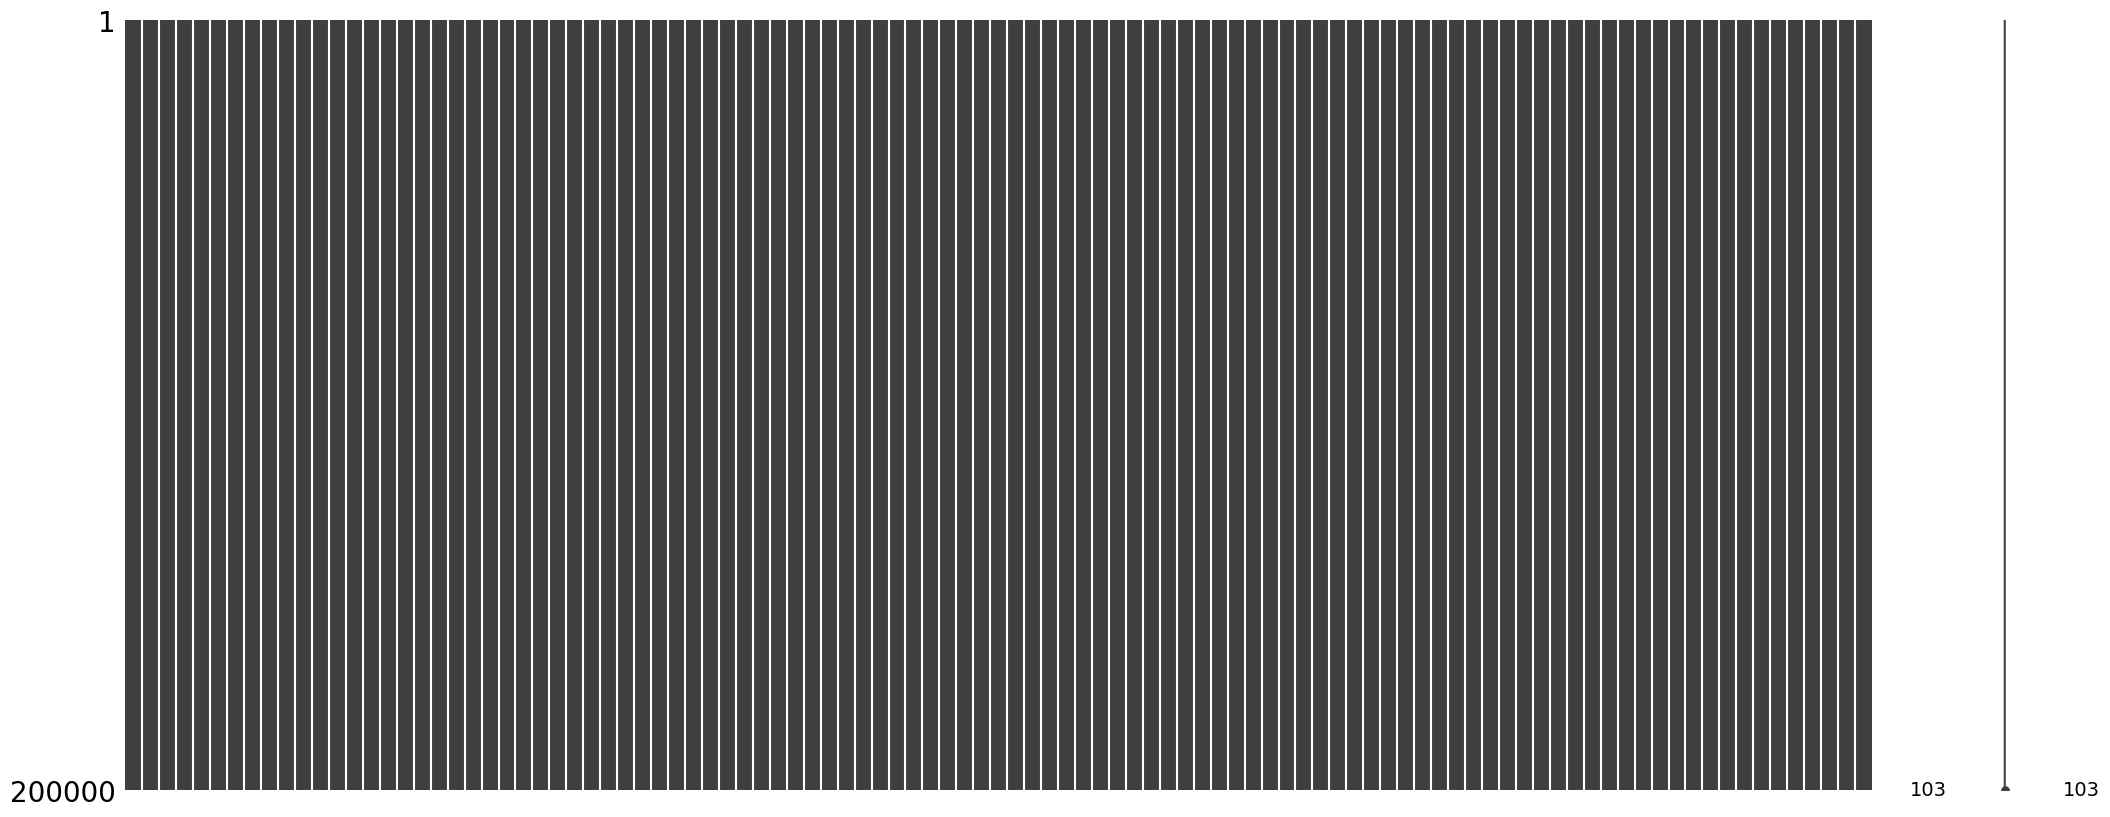

In [8]:
## 导入缺失值可视化包
import missingno
# 查看缺失值的分布
# missingno.matrix(df_cleaned)
import missingno as msno
msno.matrix(df_cleaned)
plt.show()


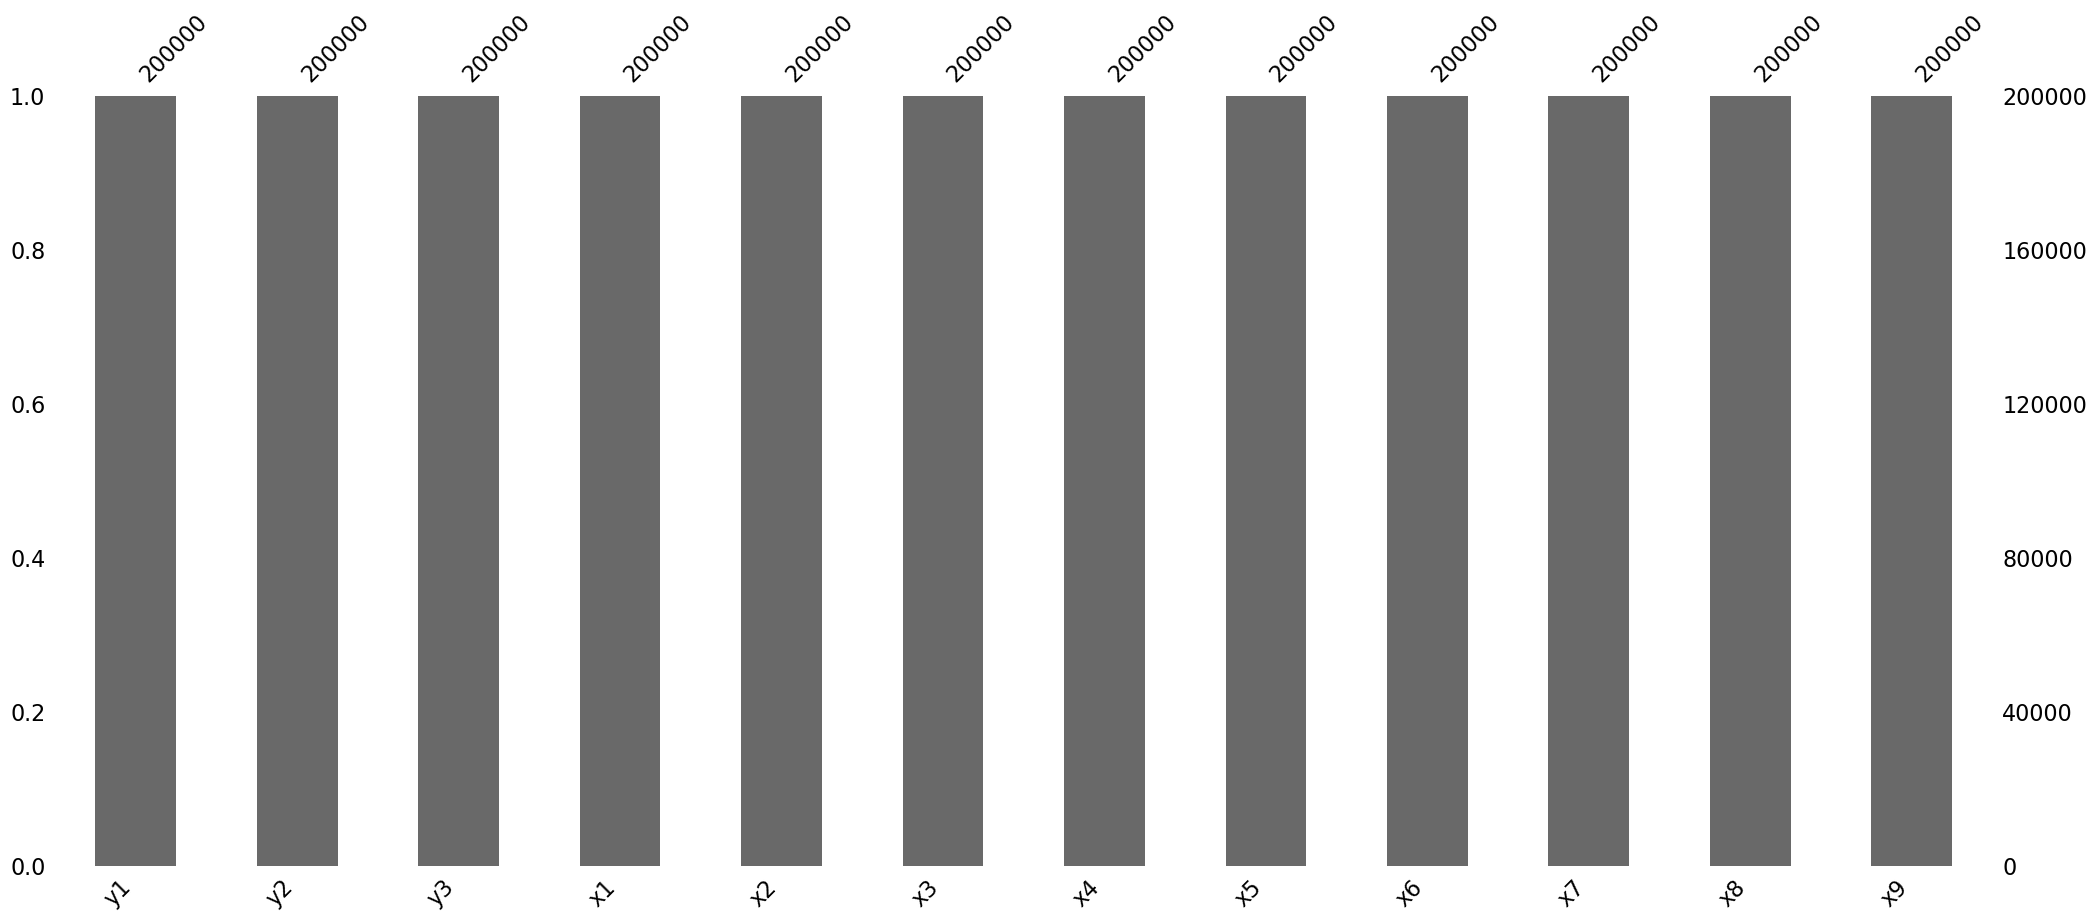

In [9]:
# 或者使用 barplot 来查看缺失值数量
msno.bar(df_cleaned.iloc[:,0:12])
plt.show()

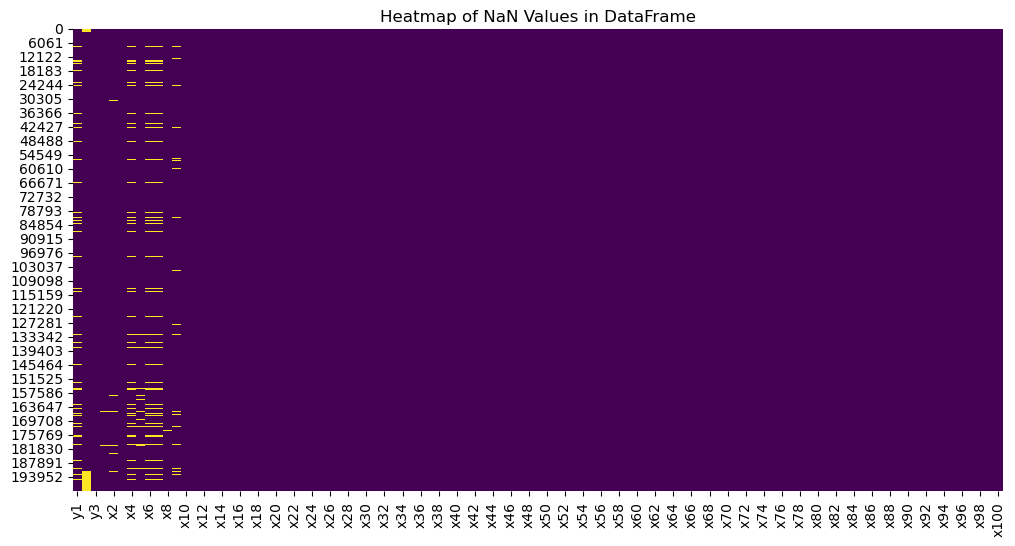

In [9]:
import seaborn as sns

def visualize_nan_heatmap(df_cleaned):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_cleaned.isna(), cbar=False, cmap='viridis')
    plt.title('Heatmap of NaN Values in DataFrame')
    plt.show()

# 可视化整个数据框中的 NaN 值
visualize_nan_heatmap(df_cleaned)

C:\Users\yangz\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yangz\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


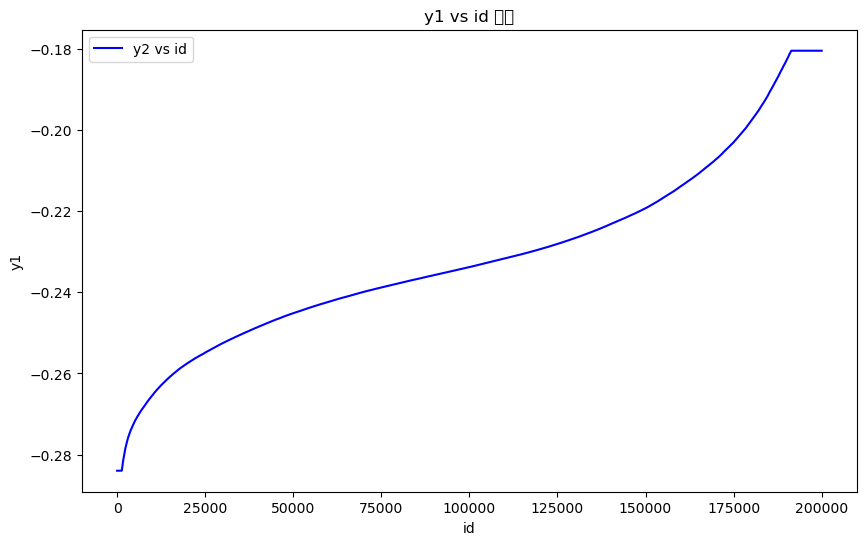

In [15]:
# 绘制 y2 和 id 的曲线
plt.figure(figsize=(10, 6))

# 假设 'id' 是索引列，'y2' 是要绘制的值
plt.plot(data['id'], df_cleaned['y2'], label='y2 vs id', color='blue')

# 添加图例和标签
plt.xlabel('id')
plt.ylabel('y1')
plt.title('y1 vs id 曲线')
plt.legend()

# 显示图像
plt.show()

箱线图对比

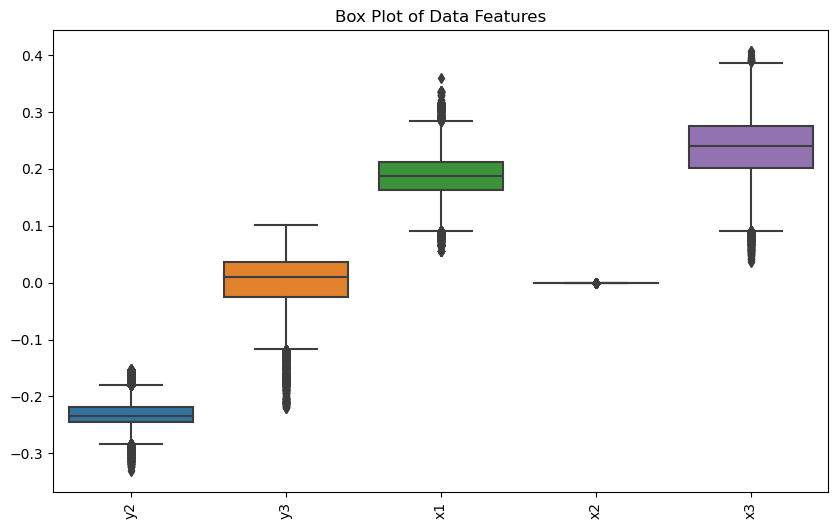

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:,3:8])
plt.xticks(rotation=90)  # 如果有很多列，可以旋转x轴标签
plt.title("Box Plot of Data Features")
plt.show()

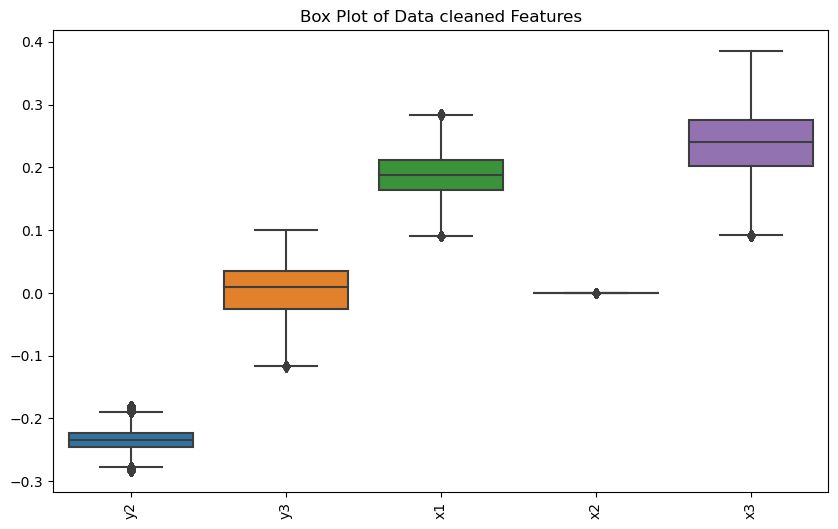

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned.iloc[:,1:6])
plt.xticks(rotation=90)  # 如果有很多列，可以旋转x轴标签
plt.title("Box Plot of Data cleaned Features")
plt.show()

数据平滑

In [10]:
def savgol_filter_data(data, window_length=11, polyorder=2):
    return savgol_filter(data, window_length=window_length, polyorder=polyorder, axis=0)
df_smooth = np.apply_along_axis(savgol_filter_data,0,df_cleaned)
df_smooth

array([[-4.53956811e+02, -2.33779197e-01,  2.55553312e-02, ...,
         1.83819279e+04,  1.07884042e+04,  2.74975999e+02],
       [-4.70658780e+02, -2.33779197e-01,  2.44700886e-02, ...,
         2.21994014e+04,  1.17973841e+04,  4.20538109e+02],
       [-4.83649191e+02, -2.33779197e-01,  2.38703902e-02, ...,
         2.51174587e+04,  1.25391389e+04,  5.31967062e+02],
       ...,
       [-4.34073583e+02, -2.33779197e-01, -2.44019631e-02, ...,
         1.55238974e+04,  1.22481300e+04,  4.48126152e+02],
       [-4.39998486e+02, -2.33779197e-01, -2.22416390e-02, ...,
         1.08699691e+04,  1.14054884e+04,  4.93594604e+02],
       [-4.45581774e+02, -2.33779197e-01, -1.93336041e-02, ...,
         5.18503806e+03,  1.05521138e+04,  5.46682125e+02]])

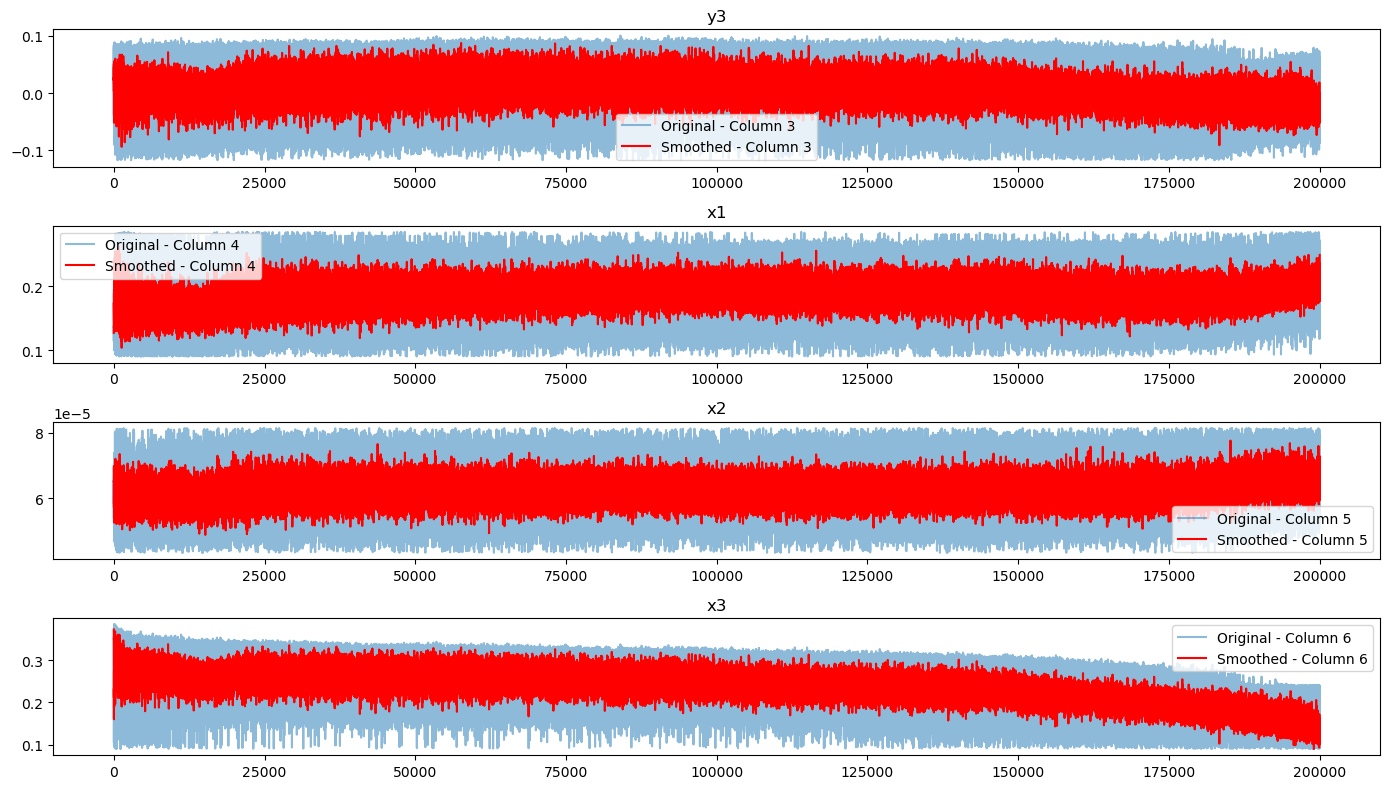

In [13]:
# 可视化原始数据和处理后的数据
plt.figure(figsize=(14, 8))

for i in range(2, 6):  # 假设要绘制第3到第6列的数据
    plt.subplot(4, 1, i-1)
    plt.plot(df.index, df.iloc[:, i], label=f'Original - Column {i+1}', alpha=0.5)  # 原始数据
    plt.plot(df.index, df_smooth[:, i], label=f'Smoothed - Column {i+1}', color='red')  # 处理后的数据
    plt.legend()
    plt.title(df.columns[i])  # 设置列名为标题

plt.tight_layout()
plt.show()

数据标准化

In [14]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_smooth)
# 创建一个 DataFrame，并保留原始列名
df_normalized = pd.DataFrame(df_scaled, columns=df_cleaned.columns)
# 将归一化后的数据保存到 Excel 文件
df_normalized.to_excel('features.xlsx', index=False)

In [15]:
df_cleaned.shape

(200000, 103)

小波变换去噪

In [ ]:
import pywt
def wavelet_denoise(data, wavelet='db4', level=1):
    coeff = pywt.wavedec(data, wavelet, mode='symmetric')
    threshold = np.sqrt(2 * np.log(len(data))) * np.median(np.abs(coeff[-level]))
    new_coeff = list(map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeff))
    return pywt.waverec(new_coeff, wavelet, mode='symmetric')
# 对每一列应用小波降噪
df_wavelet_denoised = pd.DataFrame({col: wavelet_denoise(df_cleaned[col]) for col in df_cleaned.columns})

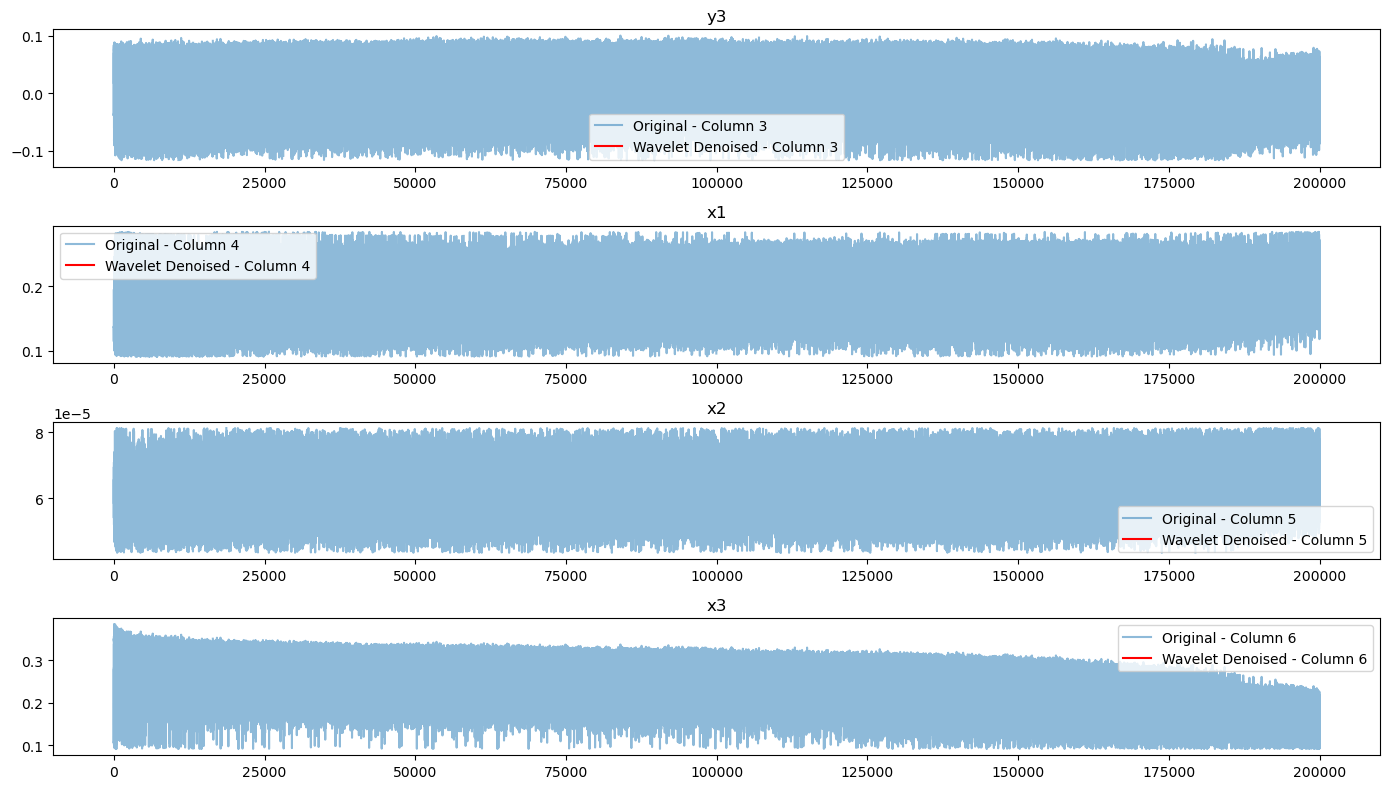

In [11]:
plt.figure(figsize=(14, 8))
for i in range(2, 6):
    plt.subplot(4, 1, i-1)
    plt.plot(df.index, df.iloc[:, i], label=f'Original - Column {i+1}', alpha=0.5)  # 原始数据
    plt.plot(df.index, df_wavelet_denoised.iloc[:, i], label=f'Wavelet Denoised - Column {i+1}', color='red')  # 处理后的数据
    plt.legend()
    plt.title(df.columns[i])  # 设置列名为标题# 调整子图之间的间距
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import zscore
df_wavelet_denoised_zscores = df_wavelet_denoised.apply(zscore)
df_wavelet_denoised_zscores.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,-0.867702,0.017236,0.523338,-3.181957,-2.247357,1.791184,-0.867994,-3.371154,-0.867855,-0.867994,...,9.032367,-3.241564,-6.145220,-5.546319,1.883049,6.901549,5.207666,5.787720,-4.776452,5.290974
1,-0.861230,0.017236,0.522595,-3.177220,-2.249046,1.760764,-0.861523,-3.351146,-0.861383,-0.861523,...,9.027526,-3.240689,-6.131576,-5.543463,1.882268,6.890688,5.206081,5.783665,-4.775559,5.255245
2,-0.854744,0.017236,0.521851,-3.172467,-2.250749,1.747420,-0.855038,-3.331034,-0.854898,-0.855038,...,9.022683,-3.239814,-6.117929,-5.540607,1.881487,6.879825,5.204495,5.779609,-4.774666,5.219487
3,-0.848242,0.017236,0.521108,-3.167697,-2.252466,1.757332,-0.848537,-3.310817,-0.848396,-0.848537,...,9.017840,-3.238938,-6.104279,-5.537750,1.880705,6.868961,5.202910,5.775553,-4.773772,5.183703
4,-0.841739,0.017236,0.520363,-3.162928,-2.254188,1.761590,-0.842035,-3.290498,-0.841894,-0.842035,...,9.012996,-3.238063,-6.090621,-5.534892,1.879924,6.858092,5.201324,5.771495,-4.772879,5.147855


In [12]:
df_wavelet_denoised.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.042361,40.161713,522.063744,1577.892568,1906.114062,15191.247467,1869.776298,21709.201881,11829.397482,383.004014
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.039373,40.162084,522.131540,1577.932221,1906.101274,15190.034067,1869.755451,21708.203682,11829.440309,382.843062
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.036384,40.162455,522.199353,1577.971886,1906.088484,15188.820511,1869.734602,21707.205257,11829.483144,382.681980
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.033394,40.162826,522.267181,1578.011566,1906.075691,15187.606850,1869.713751,21706.206616,11829.525988,382.520784
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.030404,40.163197,522.335052,1578.051249,1906.062899,15186.392511,1869.692898,21705.207631,11829.568833,382.359297


In [ ]:
df_wavelet_denoised.to_excel('features.xlsx', index=False)

In [19]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_wavelet_denoised)
# 创建一个 DataFrame，并保留原始列名
df_normalized = pd.DataFrame(df_scaled, columns=df_cleaned.columns)
# 将归一化后的数据保存到 Excel 文件
df_normalized.to_excel('features.xlsx', index=False)